In [1]:
training_path = "train"
validation_path = "validate"

import json

def load_json_lines(path):
    data = []
    with open(path + "/data.jsonl") as file:
        for line in file:
            data.append(json.loads(line))
    return data

training_json = load_json_lines(training_path)
validation_json = load_json_lines(validation_path)

In [2]:
training_json[0]

{'category_label': 6,
 'precise_label': 70,
 'uuid': '7514b86f-b382-4ca5-82a0-2b414fb70583'}

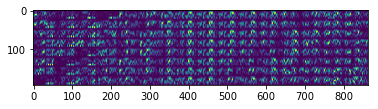

In [3]:
%matplotlib inline

from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow

sample = training_json[0]
filename = sample['uuid'] + '.png'
filepath = training_path + '/images/' + filename
img = Image.open(filepath)
imshow(img)

In [4]:
data_path = "data"

training_path = data_path + "/Kaneshiro_etAl_objectCategoryEEG"
# https://purl.stanford.edu/bq914sc3730

from scipy.io import loadmat

subjects_count = 10
subjects = []
for i in range(0, subjects_count):
    filename = "S" + str(i + 1) + ".mat"
    subjects.append(loadmat(training_path + "/" + filename))

subjects[0]

{'Fs': array([[ 62.5]]),
 'N': array([[32]], dtype=uint8),
 'T': array([[5188]], dtype=uint16),
 'X': array([[-0.26424164, -0.47586018, -0.47061757, ...,  0.05198565,
          0.08307296, -0.04543913],
        [ 0.0028675 , -0.04133774,  0.05108967, ...,  0.09525956,
         -0.00872008,  0.12494965],
        [-0.22358645,  0.02478356,  0.08543183, ...,  0.0938575 ,
          0.06906053,  0.09690079],
        ..., 
        [ 0.17795506, -0.06740315,  0.09080031, ..., -0.11675177,
         -0.19592201, -0.16641006],
        [ 0.18887348,  0.17863007,  0.32982534, ...,  0.10712342,
          0.10700955,  0.0652873 ],
        [ 0.02932549, -0.05199817, -0.15791252, ..., -0.09192452,
         -0.04275392,  0.08084101]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Fri Feb  6 14:21:30 2015',
 '__version__': '1.0',
 'categoryLabels': array([[4, 6, 3, ..., 5, 1, 1]], dtype=uint8),
 'exemplarLabels': array([[40, 64, 29, ..., 59,  3, 12]], dtype=uin

In [5]:
trial1 = subjects[0]['X'][0]
print(trial1.shape)
print(trial1)

(3968,)
[-0.26424164 -0.47586018 -0.47061757 ...,  0.05198565  0.08307296
 -0.04543913]


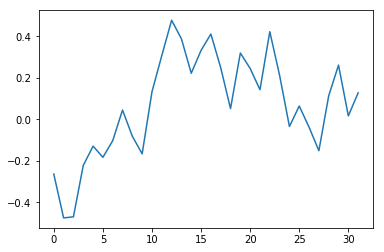

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt

N = 32
plt.plot(trial1[:N]) # plot electrode 1

In [7]:
import numpy as np

# foldsplit[0] # 10-fold cross validation, folds == subject

trials = np.concatenate([subjects[i]['X'] for i in range(9)])
y_training = np.concatenate([subjects[i]['categoryLabels'][0] for i in range(9)])
print(len(trials), len(y_training))
print(y_training)

46673 46673
[4 6 3 ..., 5 2 4]


In [8]:
trials[0]

array([-0.26424164, -0.47586018, -0.47061757, ...,  0.05198565,
        0.08307296, -0.04543913])

In [9]:
len(trials[0])

3968

In [10]:
#from sklearn.utils import shuffle

X_training = trials
#X_training_shuffled, y_training_shuffled = shuffle(X_training, y_training)

In [11]:
holdout_fold = subjects[9]
X_validation = holdout_fold['X']
print(len(X_validation), X_validation)

y_validation = holdout_fold['categoryLabels'][0]
print(len(y_validation), y_validation)

5184 [[ 0.63071699  0.53238287  0.56498052 ...,  0.02870825  0.02721558
   0.34215394]
 [ 0.12276634  0.07957858  0.00199308 ..., -0.00191029 -0.05771172
  -0.02692576]
 [-0.03659082 -0.08075532 -0.10016629 ..., -0.01577061  0.0127475
   0.08241198]
 ..., 
 [ 0.12776493  0.02066169 -0.11780883 ..., -0.00844402  0.10320733
   0.06531146]
 [-0.24601796 -0.18427435 -0.02046263 ...,  0.20250326  0.26181931
  -0.04597046]
 [ 0.16304573  0.0402427   0.02112196 ..., -0.018746    0.3735711
   0.00758652]]
5184 [1 6 1 ..., 6 4 6]


## Class Balance Check 

(array([ 7787.,     0.,  7777.,     0.,  7778.,     0.,     0.,  7779.,
            0.,  7776.,     0.,  7776.]),
 array([ 1.        ,  1.41666667,  1.83333333,  2.25      ,  2.66666667,
         3.08333333,  3.5       ,  3.91666667,  4.33333333,  4.75      ,
         5.16666667,  5.58333333,  6.        ]),
 <a list of 12 Patch objects>)

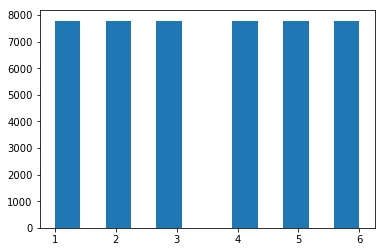

In [12]:
plt.hist(y_training, bins = 12)

(array([ 864.,    0.,  864.,    0.,  864.,    0.,    0.,  864.,    0.,
         864.,    0.,  864.]),
 array([ 1.        ,  1.41666667,  1.83333333,  2.25      ,  2.66666667,
         3.08333333,  3.5       ,  3.91666667,  4.33333333,  4.75      ,
         5.16666667,  5.58333333,  6.        ]),
 <a list of 12 Patch objects>)

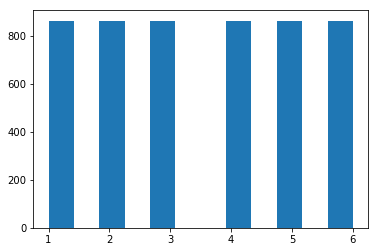

In [13]:
plt.hist(y_validation, bins=12)

In [14]:
X_training[0].shape

(3968,)

In [15]:
X_training.shape

(46673, 3968)

In [16]:
electrodes = 124
N = 32 # time samples per trial
X_training = np.reshape(X_training, (-1, electrodes, N, 1)) # no color
X_training.shape

(46673, 124, 32, 1)

In [17]:
print(X_validation.shape)
X_validation = np.reshape(X_validation, (-1, electrodes, N, 1))
X_validation.shape

(5184, 3968)


(5184, 124, 32, 1)

In [19]:
X_training_kur  = np.reshape(X_training, (-1, electrodes, N))
X_validation_kur = np.reshape(X_validation, (-1, electrodes, N))

In [20]:
import keras

num_classes = 6
y_training1hot = keras.utils.to_categorical(y_training - 1, num_classes)

Using TensorFlow backend.


In [21]:
y_validation1hot = keras.utils.to_categorical(y_validation - 1, num_classes)

In [22]:
import pickle

with open('training.kur.pkl', 'wb') as fh:
    fh.write(pickle.dumps({'trial' : X_training_kur, 'category_label' : y_training1hot}))

with open('validation.kur.pkl', 'wb') as fh:
    fh.write(pickle.dumps({'trial' : X_validation_kur, 'category_label' : y_validation1hot}))

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X_training.shape[1:]))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

history = model.fit(X_training, y_training1hot, 
                    epochs=64, 
                    validation_data=(X_validation, y_validation1hot), 
                    shuffle=True)

Train on 46673 samples, validate on 5184 samples
Epoch 1/64
46673/46673 [==============================] - 41s - loss: 1.7031 - acc: 0.2805 - val_loss: 1.7146 - val_acc: 0.2589
Epoch 2/64
46673/46673 [==============================] - 41s - loss: 1.5698 - acc: 0.3533 - val_loss: 1.6942 - val_acc: 0.2959
Epoch 3/64
46673/46673 [==============================] - 41s - loss: 1.4650 - acc: 0.4012 - val_loss: 1.7404 - val_acc: 0.2733
Epoch 4/64
46673/46673 [==============================] - 41s - loss: 1.3648 - acc: 0.4449 - val_loss: 1.8698 - val_acc: 0.2737
Epoch 5/64
46673/46673 [==============================] - 41s - loss: 1.2756 - acc: 0.4821 - val_loss: 1.9412 - val_acc: 0.2674
Epoch 6/64
46673/46673 [==============================] - 41s - loss: 1.1755 - acc: 0.5228 - val_loss: 2.1586 - val_acc: 0.2689
Epoch 7/64
46673/46673 [==============================] - 41s - loss: 1.0852 - acc: 0.5575 - val_loss: 2.4489 - val_acc: 0.2554
Epoch 8/64
46673/46673 [==============================]

In [24]:
history2 = model.fit(X_training, y_training1hot, 
                     epochs=128, 
                     validation_data=(X_validation, y_validation1hot), 
                     shuffle=True, 
                     initial_epoch=64)

Train on 46673 samples, validate on 5184 samples
Epoch 65/128
46673/46673 [==============================] - 41s - loss: 0.3889 - acc: 0.8494 - val_loss: 6.4297 - val_acc: 0.2367
Epoch 66/128
46673/46673 [==============================] - 41s - loss: 0.3992 - acc: 0.8467 - val_loss: 6.1622 - val_acc: 0.2521
Epoch 67/128
46673/46673 [==============================] - 41s - loss: 0.3895 - acc: 0.8482 - val_loss: 6.3501 - val_acc: 0.2459
Epoch 68/128
46673/46673 [==============================] - 41s - loss: 0.3823 - acc: 0.8510 - val_loss: 5.8469 - val_acc: 0.2627
Epoch 69/128
46673/46673 [==============================] - 41s - loss: 0.3719 - acc: 0.8554 - val_loss: 6.7197 - val_acc: 0.2456
Epoch 70/128
46673/46673 [==============================] - 41s - loss: 0.3755 - acc: 0.8545 - val_loss: 6.3259 - val_acc: 0.2454
Epoch 71/128
46673/46673 [==============================] - 41s - loss: 0.3841 - acc: 0.8521 - val_loss: 6.4543 - val_acc: 0.2542
Epoch 72/128
46673/46673 [===============

In [25]:
model.save_weights('weights.hdf5')

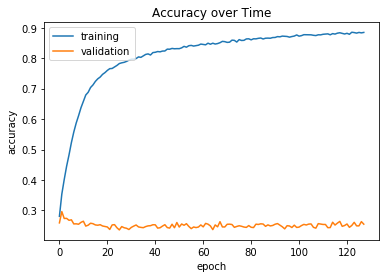

In [30]:
plt.plot(history.history['acc'] + history2.history['acc'])
plt.plot(history.history['val_acc'] + history2.history['val_acc'])
plt.title('Accuracy over Time')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

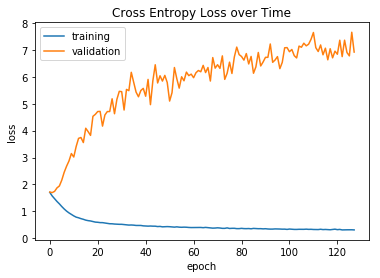

In [31]:
plt.plot(history.history['loss'] + history2.history['loss'])
plt.plot(history.history['val_loss'] + history2.history['val_loss'])
plt.title('Cross Entropy Loss over Time')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

Confusion matrix, without normalization
[[206 122  87  74 168 207]
 [114 286  59  43 161 201]
 [101 107 174  84 213 185]
 [242 164  86 156 121  95]
 [134 125 100  86 250 169]
 [108 102  74  47 285 248]]


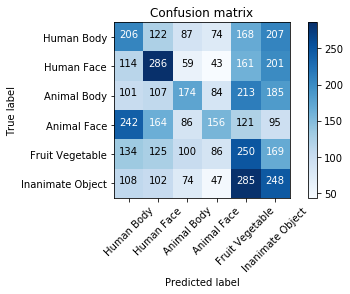

In [45]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_validation - 1, np.argmax(y_validation_predictions, axis=1))

plt.figure()
class_names = ['Human Body', 'Human Face', 'Animal Body', 'Animal Face', 'Fruit Vegetable', 'Inanimate Object']
plot_confusion_matrix(cnf_matrix, classes=class_names)